# Cropping white Space

In [ ]:
from matplotlib import pyplot as plt
from glob import glob 
from scene_definitions import get_larger_test_and_validation_scenes
from PIL import Image
import matplotlib.cm as cm
from PIL import Image, ImageChops
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib
import json


font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

def trim(im):
    "from https://stackoverflow.com/questions/10615901/trim-whitespace-using-pil"
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    
    
    
# experiments = ["FineTuned Segformer unCalibrated", "FineTuned Segformer Calibrated", 
# "Segformer Direct 3D Vector Scaled Large - Further Opt", 
# "Bayesian Dropout Reconstruction 0.9", "Spaced Out Sample Opt", "Naive Averaging", 
# "Histogram Integration", "Vector VEDE","Calibrated Averaging"],
# short_names = ["Uncalibrated", "3D temp scaled", "Vector Scaling", 
#  "Bayesian Dropout", "VEDE", "Naive Averaging", 
#  "Histogram Integration", "Vector VEDE","Calibrated Averaging"]

# experiments =  ["FineTuned Segformer unCalibrated","Naive Averaging","Averaging VEDE","Averaging-Informed VEDE - all_labels","Averaging-Informed VEDE - Coarse","Averaging-Informed VEDE FINE"]
# short_names =  ["Naive Bayesian","Averaging VEDE","Naive Averaging","Averaging-Informed VEDE - all_labels","Averaging-Informed VEDE - Coarse","Averaging-Informed VEDE FINE"]

a = json.load(open('./experiments_and_short_names.json','r'))

experiments = a['experiments']
short_names = a['short_names']


In [ ]:
template = '/home/motion/Instance Retrieval/Results/pred_vis/*/{}/{}.png'
val_scenes,test_scenes = get_larger_test_and_validation_scenes()
attributes = ['diff','conf','obs','error_correlations','pred']
for scene in tqdm(test_scenes):
    for attribute in attributes:
        attr_series = pd.Series(sorted(glob(template.format(scene,attribute))))
        for index,filename in enumerate(attr_series):
            img = trim(Image.open(filename))
            img.save(filename)
#     diffs = pd.Series(sorted(glob(template.format(scene,'diff'))))
#     confs = pd.Series(sorted(glob(template.format(scene,'conf'))))
#     obs = pd.Series(sorted(glob(template.format(scene,'obs'))))
#     error_correlations = pd.Series(sorted(glob(template.format(scene,'error_correlations'))))
    
#     tmp = pd.Series(diffs).str.split('/',expand = True)
#     tmp.loc[:,'original_index'] = tmp.index
#     subselection = tmp.loc[tmp.iloc[:,6].isin(short_names),:]
#     subselection = subselection.set_index(6)
#     idx = subselection.loc[short_names,'original_index'].values    
#     diffs = diffs[idx]
#     obs = obs[idx]
#     confs = confs[idx]
    # we then filter diffs,confs and obs

#     for index,fs in enumerate(zip(diffs,confs,obs,error_correlations)):
#         diff_file,conf_file,obs_file,error_correlation_file = fs
#         diff = trim(Image.open(diff_file))
#         conf = trim(Image.open(conf_file))
#         obs = trim(Image.open(obs_file))
#         error_correlation = trim(Image.open(error_correlation_file))
#         diff.save(diff_file)
#         conf.save(conf_file)
#         obs.save(obs_file)
#         error_correlation.save(error_correlation_file)
    #     plt.show()

# Generating the images

In [ ]:
from matplotlib import pyplot as plt
from glob import glob 
from scene_definitions import get_larger_test_and_validation_scenes
from PIL import Image
import matplotlib.cm as cm
from PIL import Image, ImageChops
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib
import json 
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

def trim(im):
    "from https://stackoverflow.com/questions/10615901/trim-whitespace-using-pil"
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    
    
    
# experiments = ["FineTuned Segformer unCalibrated", "FineTuned Segformer Calibrated", 
# "Segformer Direct 3D Vector Scaled Large - Further Opt", 
# "Naive Averaging", 
# "Histogram Integration", "Vector VEDE","Calibrated Averaging"],
# short_names = ["Uncalibrated", "3D temp scaled", "Vector Scaling", 
# "Naive Averaging", 
#  "Histogram Integration", "Vector VEDE","Calibrated Averaging"]

# experiments = ["FineTuned Segformer unCalibrated","Naive Averaging","Generalized Learned NLL and Fixed mDECE smaller LR"],
# short_names = ["Naive Bayesian","Naive Averaging","Generalized Learned NLL and Fixed mDECE smaller LR"]


a = json.load(open('./experiments_and_short_names.json','r'))

experiments = np.array(a['experiments'][:4])[[1,3,0,2]]
short_names = np.array(a['short_names'][:4])[[1,3,0,2]]

In [ ]:
template = '/home/motion/Instance Retrieval/Results/pred_vis/*/{}/{}.png'
val_scenes,test_scenes = get_larger_test_and_validation_scenes()


for scene in tqdm(test_scenes):
    print(scene)
    diffs = pd.Series(sorted(glob(template.format(scene,'diff'))))
    confs = pd.Series(sorted(glob(template.format(scene,'conf'))))
    obs = pd.Series(sorted(glob(template.format(scene,'obs'))))
    preds = pd.Series(sorted(glob(template.format(scene,'pred'))))
    gts = pd.Series(sorted(glob(template.format(scene,'gt'))))
    error_correlations = pd.Series(sorted(glob(template.format(scene,'error_correlations'))))
    tmp = pd.Series(diffs).str.split('/',expand = True)
    tmp.loc[:,'original_index'] = tmp.index
    subselection = tmp.loc[tmp.iloc[:,6].isin(short_names),:]
    subselection = subselection.set_index(6)
    idx = subselection.loc[short_names,'original_index'].values    
    diffs = diffs[idx]
    obs = obs[idx]
    confs = confs[idx]
    preds = preds[idx]
    gts = gts[idx]
    plt.rcParams["axes.titlesize"] = 10
    # we then filter diffs,confs and obs
    nrows = 3
    ncols = len(short_names)
    fig,ax = plt.subplots(nrows,ncols,figsize = (5*ncols,5*nrows))
    for col in range(ncols):
        for row in range(nrows):
#             ax[row][col].axis('off')
            ax[row][col].get_xaxis().set_ticks([])
            ax[row][col].get_yaxis().set_ticks([])
            ax[row][col].spines['top'].set_visible(False)
            ax[row][col].spines['right'].set_visible(False)
            ax[row][col].spines['bottom'].set_visible(False)
            ax[row][col].spines['left'].set_visible(False)

    plt.axis('off')
    for index,fs in enumerate(zip(diffs,confs,preds,gts)):
        diff,conf,pred,gt = fs
        exp_name = diff.split('/')[-3]
        diff = trim(Image.open(diff))
        conf = trim(Image.open(conf))
        gt = trim(Image.open(gt))
        pred = trim(Image.open(pred))
        

        sm = plt.cm.ScalarMappable(cmap=cm.inferno)
        sm.set_array([])
        
#         ax[0][index].imshow(gt)
#         ax[1][index].imshow(pred)
        ax[0][index].imshow(diff)
        ax[1][index].imshow(conf)
        ax[2][index].imshow(pred)
        ax[0][index].set_title(exp_name,wrap = True,loc = 'center')
        if(index == 0):
            ax[0][index].set_ylabel('Error Map')
            ax[1][index].set_ylabel('Confidence Map')
            ax[2][index].set_ylabel('Prediction')
        sm = plt.cm.ScalarMappable(cmap=cm.inferno)
    # description_ax = fig.add_axes([0.1, 0.05, 0.01, 0.4])
    fig.colorbar(sm, boundaries=np.arange(0,1.04,.02),cax = cbar_ax)
    savedir = '/home/motion/Instance Retrieval/Results/pred_vis/Aggregate/{}.png'.format(scene)
    plt.savefig(savedir,bbox_inches = 'tight')
    plt.show()
#     break
    #     plt.show()

# Version 2 of the figure

In [ ]:
from matplotlib import pyplot as plt
from glob import glob 
from scene_definitions import get_larger_test_and_validation_scenes
from PIL import Image
import matplotlib.cm as cm
from PIL import Image, ImageChops
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib
import json 
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)


a = json.load(open('./experiments_and_short_names.json','r'))

# experiments = np.array(a['experiments'][5:])[[0,3]]
# short_names = np.array(a['short_names'][5:])[[0,3]]
experiments = ['RBU','GLFS']
short_names = ['RBU','GLFS']
def get_files_df(attrs,scene):
    all_series = []
    for attr in attrs:
        tmp = pd.Series(sorted(glob(template.format(scene,attr))))
        all_series.append(tmp)
    df = pd.DataFrame(all_series)
    df = df.transpose()
    df.columns = attrs
    return df
attrs = ['diff','conf','obs','error_correlations','pred']



In [ ]:
template = '/home/motion/Instance Retrieval/Results/pred_vis/*/{}/{}.png'
val_scenes,test_scenes = get_larger_test_and_validation_scenes()
for scene in tqdm(test_scenes):
    print(scene)
    df = get_files_df(attrs,scene)
    tmp = df.loc[:,'diff'].str.split('/',expand = True)
    tmp.loc[:,'original_index'] = tmp.index
    subselection = tmp.loc[tmp.iloc[:,6].isin(short_names),:]
    subselection = subselection.set_index(6)
#     print(subselection)
    idx = subselection.loc[short_names,'original_index'].values    
    new_df = df.loc[idx,:].reset_index(drop = True)
    plt.rcParams["axes.titlesize"] = 10
    # we then filter diffs,confs and obs
    nrows = 2
    ncols = 4
    fig,ax = plt.subplots(nrows,ncols,figsize = (5*ncols,5*nrows))
    for col in range(ncols):
        for row in range(nrows):
#             ax[row][col].axis('off')
            ax[row][col].get_xaxis().set_ticks([])
            ax[row][col].get_yaxis().set_ticks([])
            ax[row][col].spines['top'].set_visible(False)
            ax[row][col].spines['right'].set_visible(False)
            ax[row][col].spines['bottom'].set_visible(False)
            ax[row][col].spines['left'].set_visible(False)

    plt.axis('off')
    for index,fs in enumerate(range(new_df.shape[0])):
        diff,conf,pred,error_correlation = new_df.loc[fs,['diff','conf','pred','error_correlations']]
        exp_name = diff.split('/')[-3]
        diff = Image.open(diff)
        conf = Image.open(conf)
        pred = Image.open(pred)
        error_correlation = Image.open(error_correlation)


        sm = plt.cm.ScalarMappable(cmap=cm.coolwarm)
        sm.set_clim(0,0.5)
        sm.set_array([])
        sm2 = plt.cm.ScalarMappable(cmap=cm.coolwarm)
        sm2.set_array([])
#         ax[0][index].imshow(gt)
#         ax[1][index].imshow(pred)
        ax[index][0].imshow(pred)
        ax[index][1].imshow(conf)
        ax[index][2].imshow(diff)
        ax[index][3].imshow(error_correlation)
        fsize = 30
        ax[0][0].set_title('Prediction',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][1].set_title('Uncertainty',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][2].set_title('Error Map',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][3].set_title('Error-Uncertainty Disparity',wrap = True,loc = 'center',fontsize = fsize)

#         if(index == 0):
#             ax[index][index].set_ylabel('Error Map')
#             ax[index][index].set_ylabel('Confidence Map')
        ax[index][0].set_ylabel(exp_name,fontsize = fsize)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.2, 0.02])
    cbar_ax2 = fig.add_axes([0.7, 0.05, 0.2, 0.02])
    cbar_ax.tick_params(labelsize = 30)
    fig.colorbar(sm, boundaries=np.arange(0,0.52,.02),cax = cbar_ax, orientation = 'horizontal')

    cbar_ax.set_xbound(0,0.5)
    cbar_ax.set_xticks(np.linspace(0,0.5,6))
    cbar_ax2.tick_params(labelsize = 30)

    # description_ax = fig.add_axes([0.1, 0.05, 0.01, 0.4])
    fig.colorbar(sm2, boundaries=np.arange(0,1.02,.02),cax = cbar_ax2, orientation = 'horizontal')

    cbar_ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
    print(cbar_ax.get_xbound())
    cbar_ax2.set_xbound(0,1)

    savedir = '/home/motion/Instance Retrieval/Results/pred_vis/Aggregate/{}.png'.format(scene)
    plt.savefig(savedir,bbox_inches = 'tight')
    
    plt.show()
#     break


# Version 3 of figure IV

In [ ]:
from matplotlib import pyplot as plt
from glob import glob 
from scene_definitions import get_larger_test_and_validation_scenes
from PIL import Image
import matplotlib.cm as cm
from PIL import Image, ImageChops
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib
import json 
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

a = json.load(open('./experiments_and_short_names.json','r'))

# experiments = np.array(a['experiments'][5:])[[0,3]]
# short_names = np.array(a['short_names'][5:])[[0,3]]
experiments = ['RBU','GLFS']
short_names = ['RBU','GLFS']
def get_files_df(attrs,scene):
    all_series = []
    for attr in attrs:
        tmp = pd.Series(sorted(glob(template.format(scene,attr))))
        all_series.append(tmp)
    df = pd.DataFrame(all_series)
    df = df.transpose()
    df.columns = attrs
    return df
attrs = ['diff','conf','obs','error_correlations','pred']



In [ ]:
template = '/home/motion/Instance Retrieval/Results/pred_vis/*/{}/{}.png'
val_scenes,test_scenes = get_larger_test_and_validation_scenes()
test_scenes = ['scene0699_00','scene0678_01']
for scene in tqdm(test_scenes):
    print(scene)
    df = get_files_df(attrs,scene)
    tmp = df.loc[:,'diff'].str.split('/',expand = True)
    tmp.loc[:,'original_index'] = tmp.index
    subselection = tmp.loc[tmp.iloc[:,6].isin(short_names),:]
    subselection = subselection.set_index(6)
#     print(subselection)
    idx = subselection.loc[short_names,'original_index'].values    
    new_df = df.loc[idx,:].reset_index(drop = True)
    plt.rcParams["axes.titlesize"] = 10
    # we then filter diffs,confs and obs
    nrows = 2
    ncols = 4
    fig,ax = plt.subplots(nrows,ncols,figsize = (5*ncols,5*nrows))
    for col in range(ncols):
        for row in range(nrows):
#             ax[row][col].axis('off')
            ax[row][col].get_xaxis().set_ticks([])
            ax[row][col].get_yaxis().set_ticks([])
            ax[row][col].spines['top'].set_visible(False)
            ax[row][col].spines['right'].set_visible(False)
            ax[row][col].spines['bottom'].set_visible(False)
            ax[row][col].spines['left'].set_visible(False)

    plt.axis('off')
    for index,fs in enumerate(range(new_df.shape[0])):
        diff,conf,pred,error_correlation = new_df.loc[fs,['diff','conf','pred','error_correlations']]
        exp_name = diff.split('/')[-3]
        
        diff = Image.open(diff)
        conf = Image.open(conf)
        pred = Image.open(pred)
        error_correlation = Image.open(error_correlation)
        if(scene == 'scene0678_01'):
            diff = diff.crop((110,40,640,620))
            conf = conf.crop((110,40,640,620))
            pred = pred.crop((110,40,640,620))
            error_correlation = error_correlation.crop((110,40,640,620))
#         if(scene == 'scene0699_00'):
#             diff = diff.crop((0,0,258,439))
#             conf = conf.crop((0,0,258,439))
#             pred = pred.crop((0,0,258,439))
#             error_correlation = error_correlation.crop((0,0,258,439))

        sm = plt.cm.ScalarMappable(cmap=cm.coolwarm)
        sm.set_clim(0,0.5)
        sm.set_array([])
        sm2 = plt.cm.ScalarMappable(cmap=cm.coolwarm)
        sm2.set_array([])
#         ax[0][index].imshow(gt)
#         ax[1][index].imshow(pred)
        ax[index][0].imshow(pred,interpolation='nearest', aspect='auto')
        ax[index][1].imshow(conf,interpolation='nearest', aspect='auto')
        ax[index][2].imshow(diff,interpolation='nearest', aspect='auto')
        ax[index][3].imshow(error_correlation,interpolation='nearest', aspect='auto')
        fsize = 30
        ax[0][0].set_title('Prediction',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][1].set_title('Uncertainty',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][2].set_title('Error Map',wrap = True,loc = 'center',fontsize = fsize)
        ax[0][3].set_title('EUD',wrap = True,loc = 'center',fontsize = fsize)

#         if(index == 0):
#             ax[index][index].set_ylabel('Error Map')
#             ax[index][index].set_ylabel('Confidence Map')
        ax[index][0].set_ylabel(exp_name,fontsize = fsize)
    cbar_ax = fig.add_axes([0.325, 0.05, 0.15, 0.02])
    cbar_ax2 = fig.add_axes([0.725, 0.05, 0.15, 0.02])
    labelsize = 25
    cbar_ax.tick_params(labelsize = labelsize)
    fig.colorbar(sm, boundaries=np.arange(0,0.52,.02),cax = cbar_ax, orientation = 'horizontal')

    cbar_ax.set_xbound(0,0.5)
    cbar_ax.set_xticks(np.linspace(0,0.5,6))
    cbar_ax2.tick_params(labelsize = labelsize)

    # description_ax = fig.add_axes([0.1, 0.05, 0.01, 0.4])
    fig.colorbar(sm2, boundaries=np.arange(0,1.02,.02),cax = cbar_ax2, orientation = 'horizontal')

    cbar_ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
    print(cbar_ax.get_xbound())
    cbar_ax2.set_xbound(0,1)

    savedir = '/home/motion/Instance Retrieval/Results/pred_vis/Aggregate V2/{}_v2.pdf'.format(scene)
    plt.savefig(savedir,bbox_inches = 'tight')
    
    plt.show()
#     break


# Creating Reliability mECE Diagrams

/home/motion/Instance Retrieval/calibration.py:78: RuntimeWarning: invalid value encountered in true_divide
  return self.correct_bin_members/self.total_bin_members,self.total_bin_confidence/self.total_bin_members,self.tiers[1:]


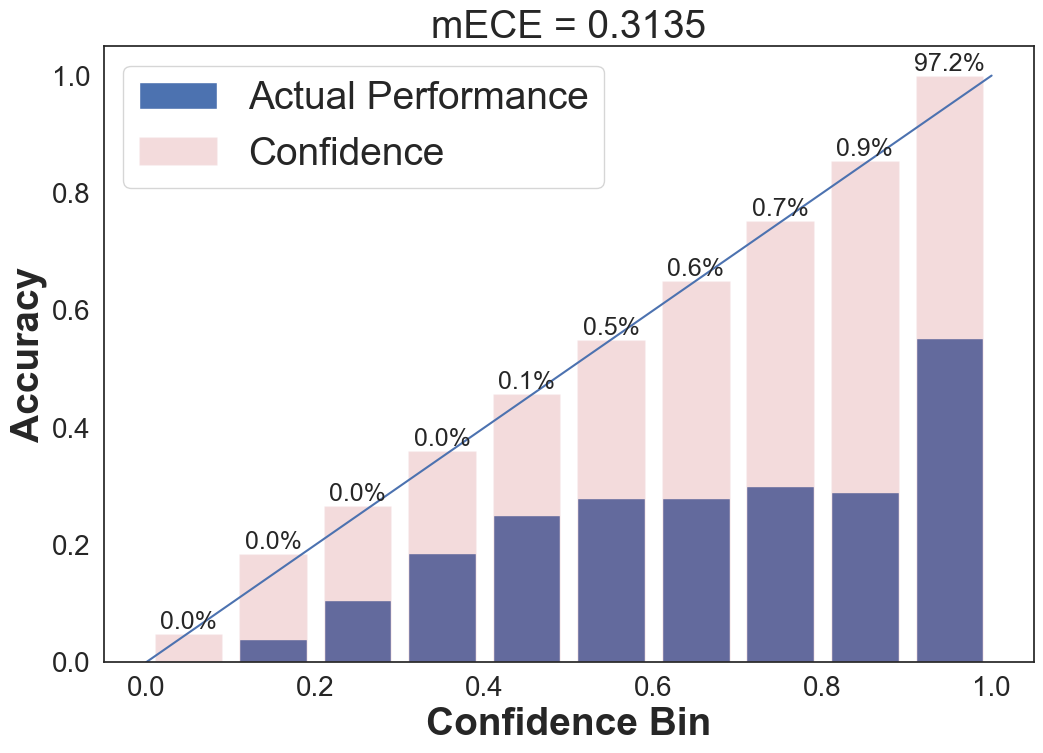

In [1]:
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
from scene_definitions import get_classes
import matplotlib
import numpy as np
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 50
       }
        

matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# cc = pickle.load(open('uncalibrated_calibration_mECE.p','rb'))
cc = pickle.load(open('3D calibration Results.p','rb'))
cc.optimization = True
sns.set_theme()
sns.set_theme(style="white", palette=None)
classes = get_classes()
short_name = '3D Calibration'
fig,ax = plt.subplots(1,1)

res = cc.return_calibration_results()
confidences = []
accuracy = []
edges = []
for i in res:
    if(i!=0):
        acc,conf,bins = res[i]
        acc[np.isnan(acc)] = 0
        conf[np.isnan(conf)] = 0
        accuracy.append(acc)
        confidences.append(conf)
        edges.append(bins)
accuracy = np.mean(accuracy,axis = 0)
confidences = np.mean(confidences,axis = 0)
lims = bins


lims = lims-0.05
cal = accuracy
#         fig, ax = plt.subplots()
fig.set_size_inches(12,8)
p1 = ax.bar(x= lims, height = cal,  width = 0.8*(lims[1]-lims[0]),color = 'b',alpha = 1,label = 'Actual Performance')
p2 = ax.bar(x= lims, height = conf, width = 0.8*(lims[1]-lims[0]),color = 'r',alpha = 0.2,label = 'Confidence')
ax.plot(np.arange(11)/10,np.arange(11)/10)
membership = (cc.agg_cal.total_bin_members/cc.agg_cal.total_bin_members.sum()*100)
membership = np.round(membership,decimals = 1)
membership = np.array([ str(i) + '%' for i in membership])

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# membership = eval(np.array_str(membership, precision=2, suppress_small=True))
label_size = 28
ax.bar_label(p2, labels = membership,label_type='edge',size = 18)
short_name = ''
ax.set_title('{}mECE = {:.4f}'.format(short_name,cc.agg_cal.get_ECE()),size = label_size)
ax.set_xlabel('Confidence Bin',size = label_size,weight = 'bold')
ax.set_ylabel('Accuracy',size = label_size, weight = 'bold')
plt.legend(fontsize = 28)
plt.savefig('/home/motion/Instance Retrieval/3D calibration.svg',bbox_inches = 'tight')
plt.show()

# generating peanut animations

In [ ]:
import cv2
import os
from glob import glob
import pandas as pd
from tqdm import tqdm

episodes = sorted(glob('/home/motion/peanut-temp/data/tmp/dump/peanut_segformer_99/*'))
videos_dir = '/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/Original/'

In [ ]:
for episode in tqdm(episodes,desc = 'episodes',position = 0):
    episode_name = episode.split('/')[-1]
    video_name = videos_dir + episode_name + '.m4v'
    sorted_images = sorted(glob(episode + '/*.jpg'))
#     images = pd.Series(images)
#     numbers = images.str.split('-',expand = True).iloc[:,-1].str.split('.',expand = True).iloc[:,0].astype(int)
#     sorted_images = images[numbers.sort_values().index]
    frame = cv2.imread(sorted_images[0])
    height, width, layers = frame.shape
   
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
    for image in tqdm(sorted_images,desc = 'frames',position = 1):
        video.write(cv2.imread(image,cv2.IMREAD_UNCHANGED))
    video.release()
#     break


In [ ]:
help(cv2.VideoWriter)

# Generating Figure 1

In [ ]:
import open3d as o3d
from ESANet_loader import ESANetClassifier, TSegmenter,FineTunedTSegmenter
from scene_definitions import get_larger_test_and_validation_scenes,get_learned_calibration_validation_scenes
from sens_reader import scannet_scene_reader
import open3d.core as o3c
import cv2
import numpy as np
from scene_definitions import get_COLORS
from klampt.math import se3
from matplotlib import pyplot as plt
from glob import glob
import pickle
from tqdm import tqdm
import time
import torch.nn as nn
import torch


root_dir = "/home/motion/data/scannet_v2"
vbg_dir = '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/vbg.npz'
pcd_file =  '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/'
_,test_scenes = get_larger_test_and_validation_scenes()

scene = 'scene0153_01'
experiment = 'Segformer Naive Bayesian'

gt_pcd_file = './Results/sanity_checks/gt_pcd_{}.pcd'.format(scene)
gt_labels_file = './Results/sanity_checks/gt_labels_{}.p'.format(scene)
pcds_template = './Results/{}/{}/*.pcd'
labels_template = './Results/{}/{}/*.p'
gt_pcd = o3d.io.read_point_cloud(gt_pcd_file)
gt_labels= pickle.load(open(gt_labels_file,'rb'))


pcd_files = sorted(glob(pcds_template.format(experiment,scene)))
label_files = sorted(glob(labels_template.format(experiment,scene)))
pcd_file = pcd_files[-1]
labels_file = label_files[-1]

pcd = o3d.io.read_point_cloud(pcd_file)
labels= pickle.load(open(labels_file,'rb')).astype(np.float64)



pcd_tree = o3d.geometry.KDTreeFlann(gt_pcd)
points = np.asarray(pcd.points)
gt_points = np.asarray(gt_pcd.points)
unscrambler = np.zeros(points.shape[0]).astype(np.int64)
scrambler = np.zeros(points.shape[0]).astype(np.int64)
for i in tqdm(range(points.shape[0])):
    [k, idx, dist] = pcd_tree.search_knn_vector_3d(points[i],1)
#     print(points[i]-gt_points[idx],i,idx)
    unscrambler[idx[0]] = i
    scrambler[i] = idx[0]
diff_labels = labels[unscrambler]

classes = np.zeros(gt_labels.shape[0]).astype(np.int64)

classes[unscrambler] = (np.argmax(diff_labels,axis = 1) == np.argmax(gt_labels,axis = 1)).astype(int)


model = FineTunedTSegmenter()
lim = -1
my_ds = scannet_scene_reader(root_dir, scene ,lim = lim,disable_tqdm = True)
total_len = len(my_ds)
get_semantics = model.get_pred_probs

mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

def to_color_map(array):
    a = np.array([1,0,0])
    b = np.array([0,0,0])
    # color = array.reshape(-1,1)*a + (1-array).reshape(-1,1)*b
    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)

    SM.autoscale()
    color = SM.to_rgba(array.flatten(),bytes = True)[:,:3]
    # print(color)
    return color



In [ ]:
# vis = o3d.visualization.draw_geometries([pcd])

In [ ]:
device = o3d.core.Device('CUDA:0')
i = 0
# for i in range(total_len):
while(True):
    try:
        data_dict = my_ds[i]
    except:
        print('\nerror while loading frame {} of scene {}\n'.format(i,scene))
        traceback.print_exc()
    #     continue


    depth = data_dict['depth']#o3d.t.io.read_image(depth_file_names[i]).to(device)
    #                 print(depth.shape)
            # print(depth.max(),depth.min())
    intrinsic = o3c.Tensor(data_dict['intrinsics_depth'][:3,:3].astype(np.float64))
    depth = o3d.t.geometry.Image(depth).to(device)


    semantic_label = get_semantics(data_dict['color'],depth = data_dict['depth'],x = depth.rows,y = depth.columns)
    COLORS = get_COLORS()
    semantic_masks = semantic_label.argmax(axis = 2)
    colored_masks = COLORS[semantic_masks]
#     confidence = np.clip(1-semantic_label.max(axis = 2),0,0.5)/0.5
    confidence = 1-semantic_label.max(axis = 2)
    #     confidence_2d = (255*confidence).astype(np.uint8)
    gt = data_dict['semantic_label'].astype(np.uint8)
    gt =  cv2.resize(gt,(depth.columns,depth.rows),interpolation= cv2.INTER_NEAREST)
    colored_gt = COLORS[gt]
    colored_gt = cv2.resize(colored_gt,(depth.columns,depth.rows),interpolation= cv2.INTER_NEAREST)
    error_map = (semantic_masks != gt).astype(np.float32)
    disparity = np.abs((2*confidence.astype(float)-(metric_error_map.astype(float))))
    metric_error_map = error_map
    orig_shape = list(error_map.shape)
    orig_shape.append(3)
    colored_disparity = to_color_map(disparity.flatten()).reshape(orig_shape)
    error_map = to_color_map(error_map.flatten())
    error_map = error_map.reshape(orig_shape)
    confidence_2d = to_color_map(confidence.flatten()).reshape(orig_shape)
    # error_map = cv2.cvtColor(error_map, cv2.COLOR_RGB2BGR)
    # confidence_2d = cv2.cvtColor(confidence_2d, cv2.COLOR_RGB2BGR)
    cv2.imshow('2D Pred',colored_masks)
    cv2.imshow('gt',colored_gt)
    cv2.imshow('error_map',error_map)
    
#     cv2.imshow('color',data_dict['color'])
    cv2.imshow('uncertainty',confidence_2d)
    
    
    k = cv2.waitKey(0)
    if(k & 0xFFFF == ord('q')):
        cv2.destroyAllWindows()
        break
    if(k & 0xFFFF == ord('a')):
        i -= 1
    if(k & 0xFFFF == ord('d')):
        i +=1
#     break

In [ ]:
def save_figure(target_directory,name,fig):
    cv2_fig = cv2.cvtColor(fig, cv2.COLOR_RGB2BGR)
    res = cv2.imwrite('{}/{}.png'.format(target_directory,name),cv2_fig)
    print('This was the result {}'.format(res))

target_dir = '/home/motion/Joao/Papers/ICRA 2024/Figures/figure1'

save_figure(target_dir,'2D_error_map',error_map)
save_figure(target_dir,'2D_uncertainty',confidence_2d)
save_figure(target_dir,'2D_disparity',colored_disparity)
save_figure(target_dir,'2D_prediction',colored_masks)

# cv2.imwrite('{}/2D_error_map.png'.format(target_dir),error_map)
# cv2.imwrite('{}/2D_prediction.png'.format(target_dir),colored_masks)
# cv2.imwrite('{}/2D_uncertainty.png'.format(target_dir),confidence_2d)
# cv2.imwrite('{}/2D_disparity.png'.format(target_dir),colored_disparity)


In [ ]:
chosen_frame = 202

In [ ]:
vbg = o3d.t.geometry.VoxelBlockGrid.load(vbg_dir.format(scene))
def extract_visible_metric_point_cloud(vbg,weight_threshold = 1.0,pose = None,
                                       intrinsics = None,already_right = False,
                                      W= 640,H= 480):
    start = time.time()
    cpu_device =  o3d.core.Device('CPU:0')
    if(not already_right):
        extrinsics = se3.from_ndarray(pose)
        extrinsics = se3.ndarray(se3.inv(extrinsics))
        extrinsics = o3c.Tensor(extrinsics).to(o3c.float64).to(cpu_device)
    else:
        extrinsics = o3c.Tensor(pose).to(o3c.float64)

    W = 640
    H = 480
#     intrinsics = get_intrinsics(W,H)
#     intrinsics = o3c.Tensor(intrinsics.astype(np.float64))

#     active_block_coords = self.active_frustum_block_coords
    # print('before rendering took {}'.format(time.time()-start))
    start = time.time()
    res = vbg.ray_cast(vbg.hashmap().key_tensor(),intrinsic = intrinsics,extrinsic = extrinsics,
       width = W,height =H,depth_min = 0.5,depth_max = 5,
       render_attributes = ['depth','index','interp_ratio'],range_map_down_factor = 8,depth_scale =1,
       weight_threshold = weight_threshold,trunc_voxel_multiplier = 8)
#     import pdb
#     pdb.set_trace()
        # print('rendering took {}'.format(time.time()-start))
    start = time.time()
    depth = o3d.t.geometry.Image(res.depth)
    pcd = o3d.t.geometry.PointCloud.create_from_depth_image(depth,intrinsics,extrinsics,depth_scale = 1,depth_max = 5.0)
    # print('point cloud creation took {}'.format(time.time()-start))
    return res

In [ ]:
reply = extract_visible_metric_point_cloud(vbg,pose = data_dict['pose'],intrinsics =intrinsic)

def retrieve_probits(vbg,res):
    labels = vbg.attribute('label').reshape((-1, 21))
    nb_indices = res['index'].reshape((-1))
    nb_interp_ratio = res['interp_ratio'].reshape((-1,1))
    nb_labels = (labels[nb_indices]*nb_interp_ratio).cpu().numpy()
    sm = nn.Softmax(dim = 2)
    sum_labels = nb_labels.reshape((480,640,8,21)).sum(axis = 2)
    probits = sm(torch.from_numpy(sum_labels)).cpu().numpy()
    return probits

In [ ]:
probits = retrieve_probits(vbg,reply)


fused_semantic_mask = probits.argmax(axis =2)
errors_3d = fused_semantic_mask != gt
colored_errors_3d = to_color_map(errors_3d).reshape(orig_shape)
colored_fused = COLORS[fused_semantic_mask]
fused_uncertainty = np.clip(1- probits.max(axis = 2),0,0.5)/0.5
disparity = np.abs(fused_uncertainty-errors_3d)
colored_disparity = to_color_map(disparity).reshape(orig_shape)
colored_fused_uncertainty = to_color_map(fused_uncertainty).reshape(orig_shape)
from matplotlib import pyplot as plt

plt.imshow(colored_fused)
plt.show()
plt.imshow(colored_fused_uncertainty)
plt.show()
plt.imshow(colored_errors_3d)
plt.show()
plt.imshow(colored_disparity)

names = ['3d_prediction','3d_uncertainty','3d_disparity','3d_error_map']
images = [colored_fused,colored_fused_uncertainty,colored_disparity,colored_errors_3d]
for name,img in zip(names,images):
    save_figure(target_dir,name,img)


In [ ]:
intrinsic

In [ ]:
cam_params = o3d.io.read_pinhole_camera_parameters('camera_parameters.json')

# Extract extrinsics matrix (view matrix)
extrinsics = cam_params.extrinsic

this_intrinsic = o3c.Tensor(np.asarray(np.asarray(cam_params.intrinsic.intrinsic_matrix).tolist()).astype(np.float64))
width = cam_params.intrinsic.width
height = cam_params.intrinsic.height

reply2=extract_visible_metric_point_cloud(vbg,pose = extrinsics,intrinsics =intrinsic,
                                          already_right = True, weight_threshold = 20)

depth = reply2['depth'].cpu().numpy()[:,:,0]
invalid = depth<=0
probits = retrieve_probits(vbg,reply2)

fused_semantic_mask = probits.argmax(axis =2)
colored_fused = COLORS[fused_semantic_mask]
colored_fused[invalid] = 255
fused_uncertainty = np.clip(1- probits.max(axis = 2),0,0.5)/0.5

colored_fused_uncertainty = to_color_map(fused_uncertainty).reshape(orig_shape)

from matplotlib import pyplot as plt

plt.imshow(colored_fused)
plt.show()
plt.imshow(colored_fused_uncertainty)
# cv2.imwrite('{}/3D_full_map.png'.format(target_dir),colored_fused)
save_figure(target_dir,'3D_full_map',colored_fused)


In [ ]:
import open3d as o3d
import numpy as np

# Load your point cloud data or generate a sample point cloud
# Replace 'your_point_cloud.xyz' with your point cloud file path or provide your data
# point_cloud = o3d.io.read_point_cloud('your_point_cloud.xyz')

# Create a function to capture the selected viewpoint
def capture_viewpoint(vis):
    # Get the camera parameters from the current viewpoint
    cam_params = vis.get_view_control().convert_to_pinhole_camera_parameters()
    
    # Save the camera parameters to a file
    o3d.io.write_pinhole_camera_parameters('camera_parameters.json', cam_params)
    print("Viewpoint saved to 'camera_parameters.json'")
    return False

# Create a visualizer
vis = o3d.visualization.Visualizer()
vis.create_window()

# Add the point cloud to the visualizer
vis.add_geometry(pcd)

# Register the viewpoint capture function
vis.register_animation_callback(capture_viewpoint)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
# Load the saved camera parameters


# Extract rotation and translation components
rotation_matrix = extrinsics[:3, :3]
translation_vector = extrinsics[:3, 3]

# Calculate camera position (eye), look-at target, and up vector
eye = translation_vector
look_at = eye + np.dot(rotation_matrix, np.array([0, 0, 1]))
up = np.dot(rotation_matrix, np.array([0, 1, 0]))


In [ ]:
custom_camera = o3d.camera.PinholeCameraIntrinsic(
        cam_params.intrinsic.width, cam_params.intrinsic.height,
        cam_params.intrinsic.intrinsic_matrix[0, 0], cam_params.intrinsic.intrinsic_matrix[1, 1],
        cam_params.intrinsic.intrinsic_matrix[0, 2], cam_params.intrinsic.intrinsic_matrix[1, 2])

# Capturing the desired viewpoint of the aligned figure

In [ ]:
help(render.scene.camera.look_at)

In [ ]:
import os
import numpy as np
import open3d as o3d
import open3d.core as o3c
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
import pickle
import pickle
from glob import glob
from copy import deepcopy
from scipy.stats import entropy
import time
import torch.nn as nn
import torch
import pdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scene_definitions import get_larger_test_and_validation_scenes,get_smaller_balanced_validation_scenes,get_original_small_validation_scenes,get_smaller_test_scenes
import torch.nn as nn
from pcd_utils import read_alignment
import matplotlib.cm as cm
import json
import open3d.visualization.rendering as rendering
from scene_definitions import get_COLORS


COLORS = get_COLORS()

root_dir = "/home/motion/data/scannet_v2"
vbg_dir = '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/vbg.npz'
pcd_file =  '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/'
_,test_scenes = get_larger_test_and_validation_scenes()

scene = 'scene0153_01'
experiment = 'Segformer Naive Bayesian'

gt_pcd_file = './Results/sanity_checks/gt_pcd_{}.pcd'.format(scene)
gt_labels_file = './Results/sanity_checks/gt_labels_{}.p'.format(scene)
pcds_template = './Results/{}/{}/*.pcd'
labels_template = './Results/{}/{}/*.p'
gt_pcd = o3d.io.read_point_cloud(gt_pcd_file)
gt_labels= pickle.load(open(gt_labels_file,'rb'))


pcd_files = sorted(glob(pcds_template.format(experiment,scene)))
label_files = sorted(glob(labels_template.format(experiment,scene)))
pcd_file = pcd_files[-1]
labels_file = label_files[-1]

pcd = o3d.io.read_point_cloud(pcd_file)
labels= pickle.load(open(labels_file,'rb')).astype(np.float64)
alignment_file = '{}/scans/{}/{}.txt'.format(root_dir,scene,scene)
tf = read_alignment(alignment_file)
pcd_show = pcd.transform(tf)



In [ ]:
# import open3d as o3d
# import numpy as np

# # Load your point cloud data or generate a sample point cloud
# # Replace 'your_point_cloud.xyz' with your point cloud file path or provide your data
# # point_cloud = o3d.io.read_point_cloud('your_point_cloud.xyz')

# # Create a function to capture the selected viewpoint
# def capture_viewpoint(vis):
#     # Get the camera parameters from the current viewpoint
#     cam_params = vis.get_view_control().convert_to_pinhole_camera_parameters()
    
#     # Save the camera parameters to a file
#     o3d.io.write_pinhole_camera_parameters('camera_parameters.json', cam_params)
#     print("Viewpoint saved to 'camera_parameters.json'")
#     return False

# # Create a visualizer
# vis = o3d.visualization.Visualizer()
# vis.create_window()

# # Add the point cloud to the visualizer
# vis.add_geometry(pcd_show)

# # Register the viewpoint capture function
# vis.register_animation_callback(capture_viewpoint)

# # Run the visualizer
# vis.run()
# vis.destroy_window()
cam_params = o3d.io.read_pinhole_camera_parameters('camera_parameters.json')
extrinsics = cam_params.extrinsic
# intrinsics = np.asarray(.intrinsic_matrix)
W = cam_params.intrinsic.width
H = cam_params.intrinsic.height
render = rendering.OffscreenRenderer(W, H)
render.setup_camera(cam_params.intrinsic,extrinsics)

In [ ]:




# Extract extrinsics matrix (view matrix)
extrinsics = cam_params.extrinsic
intrinsics = np.asarray(cam_params.intrinsic.intrinsic_matrix)

# Extract rotation and translation components
rotation_matrix = extrinsics[:3, :3]
translation_vector = extrinsics[:3, 3]

# Calculate camera position (eye), look-at target, and up vector
eye = translation_vector
look_at = eye + np.dot(rotation_matrix, np.array([0, 0, -1]))
up = np.dot(rotation_matrix, np.array([0, 1, 0]))

def render_image(pcd,a,b,c,intrinsics,W,H):
    mtl = rendering.MaterialRecord()
    # mtl.base_color = [1, 1, 1, 1]
    mtl.base_roughness = 1
    mtl.point_size = 10
    mtl.shader = "defaultLit"

    render.scene.set_background([255, 255, 255, 255])

    if(render.scene.has_geometry("point cloud")):

        render.scene.clear_geometry()

    render.scene.add_geometry("point cloud", pcd_show, mtl)

    render.scene.set_lighting(render.scene.LightingProfile.NO_SHADOWS, (0, 1, 0))

    render.scene.scene.enable_sun_light(False)

#     Sets the camera projection via intrinsics matrix. 
    
#     render.scene.camera.set_projection(intrinsics, 0.0, 1,H ,W)
    
#     render.scene.camera.look_at(a, b, c)
    

    bev_img = render.render_to_image()
    return np.asarray(bev_img)



In [ ]:
def to_color_map(array):
    a = np.array([1,0,0])
    b = np.array([0,0,0])
    # color = array.reshape(-1,1)*a + (1-array).reshape(-1,1)*b
    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)

    SM.autoscale()
    color = SM.to_rgba(array.flatten())[:,:3]
    # print(color)
    return color

pcd_colors = []
gt_pcd_file = './Results/sanity_checks/gt_pcd_{}.pcd'.format(scene)
gt_labels_file = './Results/sanity_checks/gt_labels_{}.p'.format(scene)
gt_pcd = o3d.io.read_point_cloud(gt_pcd_file)
gt_labels= pickle.load(open(gt_labels_file,'rb'))
counts = gt_labels.sum(axis = 1).reshape(-1,1)
bin_counts = np.digitize(counts,np.quantile(counts,np.linspace(0,1,100,endpoint = False)),right = True)/100
pcd_files = sorted(glob(pcds_template.format(experiment,scene)))
label_files = sorted(glob(labels_template.format(experiment,scene)))
pcd_file = pcd_files[-1]
labels_file = label_files[-1]
pcd = o3d.io.read_point_cloud(pcd_file)
pcd2 = o3d.io.read_point_cloud(pcd_file)
pcd3 = o3d.io.read_point_cloud(pcd_file)
pcd4 = o3d.io.read_point_cloud(pcd_file)
pcd5 = o3d.io.read_point_cloud(pcd_file)
# if(index == 0):
#     vis.add_geometry(gt_pcd)
#     vis.add_geometry(pcd)
#     vis.add_geometry(pcd2)
#     vis.add_geometry(pcd3)

labels= pickle.load(open(labels_file,'rb')).astype(np.float64)
# pdb.set_trace
# pdb.set_trace()
if(np.any(labels.sum(axis = 1)<0)):
    labels = sm(torch.from_numpy(labels)).cpu().numpy()
# we then unscramble the labels:
if(np.any(labels.sum(axis =1)>0)):
    labels = labels/labels.sum(axis =1,keepdims = True)
# print(labels)

pcd_tree = o3d.geometry.KDTreeFlann(gt_pcd)
points = np.asarray(pcd.points)
gt_points = np.asarray(gt_pcd.points)
unscrambler = np.zeros(points.shape[0]).astype(np.int64)
scrambler = np.zeros(points.shape[0]).astype(np.int64)
for i in tqdm(range(points.shape[0])):
    [k, idx, dist] = pcd_tree.search_knn_vector_3d(points[i],1)
#     print(points[i]-gt_points[idx],i,idx)
    unscrambler[idx[0]] = i
    scrambler[i] = idx[0]
diff_labels = labels[unscrambler]
# cm = confusion_matrix(np.argmax(gt_labels,axis = 1),np.argmax(diff_labels,axis=1),normalize = 'true',labels = list(range(21)))
a = np.zeros((labels.shape[0],3))

classes = np.argmax(labels,axis = 1)
# print(np.unique(classes,return_counts = True))
colors = COLORS[classes].astype(float)/255
pcd.colors = o3d.utility.Vector3dVector(colors)

# setting up the colormap for all the plots        
mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

# 255*sm.to_rgba([1.0])
# sm.set_clim(-0.01,1.01)
a = np.zeros((gt_labels.shape[0],3))

classes = np.argmax(gt_labels,axis = 1)
# print(np.unique(classes,return_counts = True))
colors = COLORS[classes].astype(float)/255
gt_pcd.colors = o3d.utility.Vector3dVector(colors)
print(scene)
# o3d.visualization.draw([gt_pcd,pcd_translated])

# now showing differences:
a = np.zeros((labels.shape[0],3))
classes = np.zeros(gt_labels.shape[0]).astype(np.int64)
classes[unscrambler] = (np.argmax(diff_labels,axis = 1) == np.argmax(gt_labels,axis = 1)).astype(int)
# print(np.unique(classes,return_counts = True))
differences_coloring = np.array([[255,0,0],[0,0,0]])
# colors = differences_coloring[classes].astype(float)/255
colors = to_color_map(1-classes)
# colors[np.argmax(gt_labels[scrambler],axis = 1) == 0,:] = [0,0,0]

# pdb.set_trace()
pcd2.colors = o3d.utility.Vector3dVector(colors)
# this_entropy = entropy(labels,axis = 1,base = 2)
this_entropy = 1-np.max(labels,axis = 1)
this_correlation = np.clip(np.abs(classes - this_entropy),0,1)
# pdb.set_trace()



# pdb.set_trace()
max_ent = 1
# this_color = np.array([255,0,0])*(this_entropy/max_ent).reshape(-1,1) + (1-this_entropy/max_ent).reshape(-1,1)*np.array([0,255,0])
# this_color = this_color.astype(np.float64)/255
#this_color = #sm.to_rgba(this_entropy)[:,:3]
this_color = to_color_map(np.clip(this_entropy/0.5,0,1.0))/0.5
pcd3.colors = o3d.utility.Vector3dVector(this_color)

# count_color = np.array([255,0,0])*(1-bin_counts).reshape(-1,1) + (bin_counts).reshape(-1,1)*np.array([0,255,0])
# count_color = count_color.astype(np.float64)/255.0
count_color = to_color_map(bin_counts.flatten())[:,:3]
# pdb.set_trace()
count_color = count_color[scrambler]
pcd4.colors = o3d.utility.Vector3dVector(count_color)
# bucketized_correlation = np.digitize(this_correlation,np.linspace(0,1,256,endpoint = True)).astype(np.float32)/256
# pdb.set_trace()





correlation_colors =to_color_map((1-this_correlation.flatten()))[:,:3]

pcd5.colors = o3d.utility.Vector3dVector(correlation_colors)

a  = o3d.geometry.OrientedBoundingBox()
tmp = a.create_from_points(gt_pcd.points)
R = tmp.R
tmp.R
center = tmp.get_center()

tmp2 = tmp.get_axis_aligned_bounding_box()
res = tmp2.get_max_bound()-tmp2.get_min_bound()
res = res[:2]    
translation = np.zeros(3)
translation[res.argmin()] = res.min() + 0.1
non_null = gt_labels.argmax(axis = 1) != 0
scrambled_non_null = deepcopy(non_null)
scrambled_non_null[unscrambler] = non_null
to_see = np.arange(np.asarray(gt_labels.shape[0]))[non_null]

to_see_scrambled = np.arange(np.asarray(gt_labels.shape[0]))[scrambled_non_null]
gt_pcd = gt_pcd.select_by_index(to_see)
pcd = pcd.select_by_index(to_see_scrambled)
pcd2 = pcd2.select_by_index(to_see_scrambled)
pcd3 = pcd3.select_by_index(to_see_scrambled)
pcd4 = pcd4.select_by_index(to_see_scrambled)
pcd5 = pcd5.select_by_index(to_see_scrambled)


# exp_save_di
alignment_file = '{}/scans/{}/{}.txt'.format(root_dir,scene,scene)
tf = read_alignment(alignment_file)
# img_save_dir = '{}/{}'.format(exp_save_dir,scene)

target_dir = '/home/motion/Joao/Papers/ICRA 2024/Figures/figure1'

def save_figure(target_directory,name,fig):
    cv2_fig = cv2.cvtColor(fig, cv2.COLOR_RGB2BGR)
    res = cv2.imwrite('{}/{}.png'.format(target_directory,name),cv2_fig)
    print('This was the result {}'.format(res))


# if(not interactive):
for this_pcd,name in zip([gt_pcd,pcd,pcd2,pcd3,pcd4,pcd5],['3d gt','3d pred','3d diff','3d conf','3d obs','3d error_correlations']):
    # Visualize Point Cloud
    pcd_show = this_pcd.transform(tf)
    print(name)
    img = render_image(pcd_show,eye,look_at,up,intrinsics,W,H)
    img = img[:,250:1400]
    plt.imshow(img)
    save_figure(target_dir,name,img)
    plt.show()

# Creating the colorbar for the figure

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the colormap
cmap_name = 'coolwarm'  # Replace with the desired colormap

# Create a figure and axis
fig, ax = plt.subplots(figsize=(1, 6))

# Create a continuous colormap
cmap = plt.get_cmap(cmap_name)

# Create a colorbar

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(0,1)
cbar = plt.colorbar(sm, cax=ax, orientation='vertical')
cbar.vmax = 1
cbar.vmin = 0
# Set the colorbar label
# cbar.set_label('Color Scale')

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0],fontsize = 150)
cbar.ax.tick_params(axis='y', labelsize=40)
# Show the figure
plt.savefig('/home/motion/Joao/Papers/ICRA 2024/Figures/figure1/disparity_colorbar.png',bbox_inches = 'tight')

In [ ]:
img = render_image(pcd_show,eye,look_at,up,intrinsics,W,H)

from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
import torch.nn as nn
import torch
a = 50*np.log(np.array([0.49,0.51]))
sm = nn.Softmax(dim = 0)
sm(torch.from_numpy(a))

# Creating Camera poses and entropy over time

In [ ]:
import os
import numpy as np
import open3d as o3d
import open3d.core as o3c
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
import pickle
import pickle
from glob import glob
from copy import deepcopy
from scipy.stats import entropy
import time
import torch.nn as nn
import torch
import pdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scene_definitions import get_larger_test_and_validation_scenes,get_smaller_balanced_validation_scenes,get_original_small_validation_scenes,get_smaller_test_scenes
import torch.nn as nn
from pcd_utils import read_alignment
import matplotlib.cm as cm
import json
import open3d.visualization.rendering as rendering
from scene_definitions import get_COLORS
import pdb
from sens_reader import scannet_scene_reader
from klampt.math import se3

COLORS = get_COLORS()

root_dir = "/home/motion/data/scannet_v2"
vbg_dir = '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/vbg.npz'
pcd_file =  '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/'
_,test_scenes = get_larger_test_and_validation_scenes()

scene = 'scene0153_01'
experiment = 'Segformer Naive Bayesian Per Frame'

figname = "/home/motion/Joao/Papers/ICRA 2024/Video/Confidence Over Time/GLFS/{:05d}.png"
o3d.visualization.RenderOption.line_width=8.0  

lim = -1
my_ds = scannet_scene_reader(root_dir, scene ,lim = lim,disable_tqdm = False)
total_len = len(my_ds)

if(lim == -1):
    lim = total_len


render = rendering.OffscreenRenderer(1024, 1024)

cam_params = o3d.io.read_pinhole_camera_parameters('camera_parameters.json')
extrinsics = cam_params.extrinsic
render.setup_camera(cam_params.intrinsic,extrinsics)

gt_pcd_file = './Results/sanity_checks/gt_pcd_{}.pcd'.format(scene)
gt_labels_file = './Results/sanity_checks/gt_labels_{}.p'.format(scene)
pcds_template = './Results/{}/{}/pcd_{:05d}.pcd'
labels_template = './Results/{}/{}/labels_{:05d}.p'
gt_pcd = o3d.io.read_point_cloud(gt_pcd_file)
gt_labels= pickle.load(open(gt_labels_file,'rb'))

def to_color_map(array):

    mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)
    orig_shape = list(array.shape)
    orig_shape.append(3)
    SM.autoscale()
    color = SM.to_rgba(array.flatten())[:,:3].reshape(orig_shape)
    # print(color)
    return color


def save_figure(fig,fig_name):
    cv2_fig = cv2.cvtColor(fig, cv2.COLOR_RGB2BGR)
    res = cv2.imwrite(fig_name,cv2_fig)
    if(res != True):
        print('Saving failed, check the path!')
#     print('This was the result {}'.format(res))

def render_image_with_camera(pcd,cam_port,render_camera = True):
    mtl = rendering.MaterialRecord()
    # mtl.base_color = [1, 1, 1, 1]
    mtl.base_roughness = 1
    mtl.point_size = 10
    mtl.shader = "defaultLit"

    render.scene.set_background([255, 255, 255, 255])

    if(render.scene.has_geometry("point cloud")):

        render.scene.clear_geometry()

    render.scene.add_geometry("point cloud", pcd, mtl)
    
    
    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = "unlitLine"
    mat.line_width = 10
    
    if(render_camera):
        render.scene.add_geometry("camera",cam_port,mat)

    render.scene.set_lighting(render.scene.LightingProfile.NO_SHADOWS, (0, 1, 0))

    render.scene.scene.enable_sun_light(False)

#     Sets the camera projection via intrinsics matrix. 
    
#     render.scene.camera.set_projection(intrinsics, 0.0, 1,H ,W)
    
#     render.scene.camera.look_at(a, b, c)
    

    bev_img = render.render_to_image()
    return np.asarray(bev_img)

In [ ]:
for i in tqdm(range(len(my_ds))):
    if(i > 3):
        data_dict = my_ds[i]
        if(np.all(np.isfinite(data_dict['pose']))):
            pcd_file = pcds_template.format(experiment,scene,i)
            labels_file = labels_template.format(experiment,scene,i)
    #         pcd_files = sorted(glob(pcds_template.format(experiment,scene)))
    #         label_files = sorted(glob(labels_template.format(experiment,scene)))
    #         pcd_file = pcd_files[-1]
    #         labels_file = label_files[-1]

            pcd = o3d.io.read_point_cloud(pcd_file)
            pcd2 = o3d.io.read_point_cloud(pcd_file)
            labels= pickle.load(open(labels_file,'rb')).astype(np.float64)
            
            
            
            if(i == len(my_ds)-1):
            
                pcd_tree = o3d.geometry.KDTreeFlann(gt_pcd)
                points = np.asarray(pcd.points)
                gt_points = np.asarray(gt_pcd.points)
                unscrambler = np.zeros(points.shape[0]).astype(np.int64)
                scrambler = np.zeros(points.shape[0]).astype(np.int64)
                for i in tqdm(range(points.shape[0])):
                    [k, idx, dist] = pcd_tree.search_knn_vector_3d(points[i],1)
                #     print(points[i]-gt_points[idx],i,idx)
                    unscrambler[idx[0]] = i
                    scrambler[i] = idx[0]
                diff_labels = labels[unscrambler]

                classes = np.zeros(gt_labels.shape[0]).astype(np.int64)

                classes[unscrambler] = np.logical_not((np.argmax(diff_labels,axis = 1) == np.argmax(gt_labels,axis = 1)).astype(int))
                error_map_colors = to_color_map(classes)
                pcd2.colors = o3d.utility.Vector3dVector(error_map_colors)
                pcd_show = pcd2.transform(tf)
                camera_show = camera_vis.transform(tf)
                error_map_image = render_image_with_camera(pcd_show,camera_show,render_camera = False)
                error_name = "/home/motion/Joao/Papers/ICRA 2024/Video/Confidence Over Time/RBU/error_map.png"
                save_figure(error_map_image,error_name)
                
            
            
            
            
            
            
            uncertainty = np.clip(2*(1-labels.max(axis =1)),0,1)
            alignment_file = '{}/scans/{}/{}.txt'.format(root_dir,scene,scene)

            label_colors = to_color_map(uncertainty)

            pcd.colors = o3d.utility.Vector3dVector(label_colors)
            extrinsic = se3.from_ndarray(data_dict['pose'])
            extrinsic = se3.ndarray(se3.inv(extrinsic))
            intrinsic = data_dict['intrinsics_depth'][:3,:3]
            camera_vis = o3d.geometry.LineSet.create_camera_visualization(640,480,intrinsic = intrinsic,extrinsic = extrinsic,scale = 0.1)
            camera_vis.paint_uniform_color([1,0,0])
            tf = read_alignment(alignment_file)
            pcd_show = pcd.transform(tf)
            camera_show = camera_vis.transform(tf)

            img = render_image_with_camera(pcd_show,camera_show)
            save_figure(img,figname.format(i))
#         if(i%2 == 0):
#             o3d.visualization.draw_geometries([pcd_show,camera_show])




# intrinsics = np.asarray(.intrinsic_matrix)
# W = cam_params.intrinsic.width
# H = cam_params.intrinsic.height
# render = rendering.OffscreenRenderer(W, H)
# render.setup_camera(cam_params.intrinsic,extrinsics)

In [ ]:
help( o3d.geometry.LineSet.create_camera_visualization)

# Creating Video Segmentation Over Time

In [ ]:
import os
import numpy as np
import open3d as o3d
import open3d.core as o3c
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
import pickle
import pickle
from glob import glob
from copy import deepcopy
from scipy.stats import entropy
import time
import torch.nn as nn
import torch
import pdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scene_definitions import get_larger_test_and_validation_scenes,get_smaller_balanced_validation_scenes,get_original_small_validation_scenes,get_smaller_test_scenes
import torch.nn as nn
from pcd_utils import read_alignment
import matplotlib.cm as cm
import json
import open3d.visualization.rendering as rendering
from scene_definitions import get_COLORS
import pdb
from sens_reader import scannet_scene_reader
from klampt.math import se3

COLORS = get_COLORS()

root_dir = "/home/motion/data/scannet_v2"
vbg_dir = '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/vbg.npz'
pcd_file =  '/home/motion/Instance Retrieval/Results/Segformer Naive Bayesian/{}/'
_,test_scenes = get_larger_test_and_validation_scenes()

scene = 'scene0153_01'
experiment = 'Segformer Learned Calibration Per Frame'

figname = "/home/motion/Joao/Papers/ICRA 2024/Video/Segmentation Over Time/GLFS/{:05d}.png"

lim = -1
my_ds = scannet_scene_reader(root_dir, scene ,lim = lim,disable_tqdm = False)
total_len = len(my_ds)

if(lim == -1):
    lim = total_len


render = rendering.OffscreenRenderer(1024, 1024)

cam_params = o3d.io.read_pinhole_camera_parameters('camera_parameters.json')
extrinsics = cam_params.extrinsic
render.setup_camera(cam_params.intrinsic,extrinsics)

gt_pcd_file = './Results/sanity_checks/gt_pcd_{}.pcd'.format(scene)
gt_labels_file = './Results/sanity_checks/gt_labels_{}.p'.format(scene)
pcds_template = './Results/{}/{}/pcd_{:05d}.pcd'
labels_template = './Results/{}/{}/labels_{:05d}.p'
gt_pcd = o3d.io.read_point_cloud(gt_pcd_file)
gt_labels= pickle.load(open(gt_labels_file,'rb'))

def to_color_map(array):

    mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)
    orig_shape = list(array.shape)
    orig_shape.append(3)
    SM.autoscale()
    color = SM.to_rgba(array.flatten())[:,:3].reshape(orig_shape)
    # print(color)
    return color


def save_figure(fig,fig_name):
    cv2_fig = cv2.cvtColor(fig, cv2.COLOR_RGB2BGR)
    res = cv2.imwrite(fig_name,cv2_fig)
    if(res != True):
        print('Saving failed, check the path!')
#     print('This was the result {}'.format(res))

def render_image_with_camera(pcd,cam_port):
    mtl = rendering.MaterialRecord()
    # mtl.base_color = [1, 1, 1, 1]
    mtl.base_roughness = 1
    mtl.point_size = 10
    mtl.shader = "defaultLit"

    render.scene.set_background([255, 255, 255, 255])

    if(render.scene.has_geometry("point cloud")):

        render.scene.clear_geometry()

    render.scene.add_geometry("point cloud", pcd_show, mtl)
    
    
    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = "unlitLine"
    mat.line_width = 10
    
    
    render.scene.add_geometry("camera",cam_port,mat)

    render.scene.set_lighting(render.scene.LightingProfile.NO_SHADOWS, (0, 1, 0))

    render.scene.scene.enable_sun_light(False)

#     Sets the camera projection via intrinsics matrix. 
    
#     render.scene.camera.set_projection(intrinsics, 0.0, 1,H ,W)
    
#     render.scene.camera.look_at(a, b, c)
    

    bev_img = render.render_to_image()
    return np.asarray(bev_img)

In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(my_ds))):
    if(i > 3):
        data_dict = my_ds[i]
        if(np.all(np.isfinite(data_dict['pose']))):
            pcd_file = pcds_template.format(experiment,scene,i)
            labels_file = labels_template.format(experiment,scene,i)
    #         pcd_files = sorted(glob(pcds_template.format(experiment,scene)))
    #         label_files = sorted(glob(labels_template.format(experiment,scene)))
    #         pcd_file = pcd_files[-1]
    #         labels_file = label_files[-1]

            pcd = o3d.io.read_point_cloud(pcd_file)
            labels= pickle.load(open(labels_file,'rb')).astype(np.float64)
            alignment_file = '{}/scans/{}/{}.txt'.format(root_dir,scene,scene)

            label_colors = COLORS[labels.argmax(axis = 1)]/255

            pcd.colors = o3d.utility.Vector3dVector(label_colors)
            extrinsic = se3.from_ndarray(data_dict['pose'])
            extrinsic = se3.ndarray(se3.inv(extrinsic))
            intrinsic = data_dict['intrinsics_depth'][:3,:3]
            camera_vis = o3d.geometry.LineSet.create_camera_visualization(640,480,intrinsic = intrinsic,extrinsic = extrinsic,scale = 0.1)
            camera_vis.paint_uniform_color([1,0,0])
            tf = read_alignment(alignment_file)
            pcd_show = pcd.transform(tf)
            camera_show = camera_vis.transform(tf)

            img = render_image_with_camera(pcd_show,camera_show)
            save_figure(img,figname.format(i))
#         if(i%2 == 0):
#             o3d.visualization.draw_geometries([pcd_show,camera_show])




# intrinsics = np.asarray(.intrinsic_matrix)
# W = cam_params.intrinsic.width
# H = cam_params.intrinsic.height
# render = rendering.OffscreenRenderer(W, H)
# render.setup_camera(cam_params.intrinsic,extrinsics)

# Making Segmentation Confidence Video

In [ ]:
import os
import numpy as np
import open3d as o3d
import open3d.core as o3c
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
import pickle
import pickle
from glob import glob
from copy import deepcopy
from scipy.stats import entropy
import time
import torch.nn as nn
import torch
import pdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scene_definitions import get_larger_test_and_validation_scenes,get_smaller_balanced_validation_scenes,get_original_small_validation_scenes,get_smaller_test_scenes
import torch.nn as nn
from ESANet_loader import FineTunedTSegmenter
from pcd_utils import read_alignment
import matplotlib.cm as cm
import json
import open3d.visualization.rendering as rendering
from scene_definitions import get_COLORS
import pdb
from sens_reader import scannet_scene_reader
from klampt.math import se3

COLORS = get_COLORS()


root_dir = "/home/motion/data/scannet_v2"

scene = 'scene0153_01'

temperatures = torch.from_numpy(pickle.load(open('/home/motion/Instance Retrieval/learned_components/Segformer Learned Calibration/temperatures.p','rb'))).float()
    
temperatures = torch.Tensor(temperatures).view(1,-1,1,1).to('cuda:0')
    
    
model = FineTunedTSegmenter(temperature = temperatures)

lim = -1
my_ds = scannet_scene_reader(root_dir, scene ,lim = lim,disable_tqdm = False)
total_len = len(my_ds)

if(lim == -1):
    lim = total_len




video_name = '/home/motion/Joao/Papers/ICRA 2024/Video/Output_videos/2D Videos/{}.m4v'


width = 640
height = 480
gt_writer = cv2.VideoWriter(video_name.format('GT'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
pred_writer = cv2.VideoWriter(video_name.format('pred'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
error_writer = cv2.VideoWriter(video_name.format('error'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
confidence = cv2.VideoWriter(video_name.format('confidence'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
disparity = cv2.VideoWriter(video_name.format('disparity'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))                  

writers = [gt_writer,pred_writer,error_writer,confidence,disparity]

def to_color_map(array):

    mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)
    orig_shape = list(array.shape)
    orig_shape.append(3)
    SM.autoscale()
    color = SM.to_rgba(array.flatten(),bytes = True)[:,:3].reshape(orig_shape)
    # print(color)
    return color

    
for i in tqdm(range(len(my_ds))):
    if(i > 3):
        device = o3d.core.Device('CUDA:0')
        data_dict = my_ds[i]
        depth = o3d.t.geometry.Image(data_dict['depth'])
        extrinsic = se3.from_ndarray(data_dict['pose'])
        semantic_label_gt = cv2.resize(data_dict['semantic_label'],(depth.columns,depth.rows),interpolation= cv2.INTER_NEAREST).astype(int)
        semantic_label = model.get_pred_probs(data_dict['color'],depth = data_dict['depth'],x = depth.rows,y = depth.columns)
        max_conf = np.clip( (1-semantic_label.max(axis = 2))/0.5,0,1)
        pred = semantic_label.argmax(axis =2)
        error_mask = pred!=semantic_label_gt
        colored_error = to_color_map(error_mask)
        disparity = np.abs(max_conf-error_mask)
        colored_conf = to_color_map(max_conf)
        disparity_colored = to_color_map(disparity)
        colored_gt = COLORS[semantic_label_gt]
        colored_pred = COLORS[pred]
        for writer,img in zip(writers,[colored_gt,colored_pred,colored_error,colored_conf,disparity_colored]):
            cv2_fig = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            writer.write(cv2_fig)
for writer in writers:
    writer.release()
                
        
        
        
        
        

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(colored_pred)

# Making confidence Video 

In [ ]:
import os
import numpy as np
import open3d as o3d
import open3d.core as o3c
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
import pickle
import pickle
from glob import glob
from copy import deepcopy
from scipy.stats import entropy
import time
import torch.nn as nn
import torch
import pdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scene_definitions import get_larger_test_and_validation_scenes,get_smaller_balanced_validation_scenes,get_original_small_validation_scenes,get_smaller_test_scenes
import torch.nn as nn
from ESANet_loader import FineTunedTSegmenter
from pcd_utils import read_alignment
import matplotlib.cm as cm
import json
import open3d.visualization.rendering as rendering
from scene_definitions import get_COLORS
import pdb
from sens_reader import scannet_scene_reader
from klampt.math import se3
from matplotlib import pyplot as plt

In [ ]:
model = FineTunedTSegmenter(model_ckpt = '/home/motion/Instance Retrieval/HM3D Finetuned SegFormer - ObjectGoalNav - sqrt weights - Shuffled - full finetune/checkpoint-62216')

In [ ]:



def to_color_map(array):

    mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)
    orig_shape = list(array.shape)
    orig_shape.append(3)
    SM.autoscale()
    color = SM.to_rgba(array.flatten())[:,:3].reshape(orig_shape)
    # print(color)
    return color


In [ ]:
imgs =sorted(glob('/home/motion/peanut-temp/data/tmp/dump/imaging_final_mixed_averaging_lowest_thold/episodes/eps_677/*.jpg'))

In [ ]:
savedir = '/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/Averaging/{}_{:05d}.png'

In [ ]:
i = 0
for i in range(len(imgs)):
    a = cv2.imread(imgs[i],cv2.IMREAD_UNCHANGED)
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    original_rgb = a[50:530,15:655]
    pred = model.get_pred_probs(original_rgb)
    confidence = pred.max(axis = 2)
    classes = pred.argmax(axis = 2) + 5
    classes[confidence<=0.95] = 0
#     classes[]
    classes[classes == 14] = 0
    # classes[classes == 9] = 0
    confidence_colors = to_color_map(confidence)
    classes_colors = (255*color_palette[classes]).astype(np.uint8)
    classes_colors = cv2.cvtColor(classes_colors, cv2.COLOR_RGB2BGR)
    original_rgb = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2BGR)
    confidence_colors = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2BGR)
    # plt.imshow(classes_colors)cv2.cvtColor(classes_colors, cv2.COLOR_RGB2BGR)
    # plt.show()
    # plt.imshow(original_rgb)
    cv2.imshow('pred',classes_colors)
    cv2.imshow('rgb',original_rgb)
    cv2.imwrite(savedir.format('rgb',i),original_rgb)
    cv2.imwrite(savedir.format('pred',i),classes_colors)
    k = cv2.waitKey(1)
    if(k & 0xFFFF == ord('q')):
        break
cv2.destroyAllWindows()

# Reconstructing map confidence

In [ ]:
import open3d as o3d
from ESANet_loader import ESANetClassifier, TSegmenter,FineTunedTSegmenter
from scene_definitions import get_larger_test_and_validation_scenes,get_learned_calibration_validation_scenes
from sens_reader import scannet_scene_reader
import open3d.core as o3c
import cv2
import numpy as np
from scene_definitions import get_COLORS
from klampt.math import se3
from matplotlib import pyplot as plt
from glob import glob
import pickle
from tqdm import tqdm
import time
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
import numpy as np 
from klampt.math import se3,so3
import open3d.visualization.rendering as rendering


def to_color_map(array):

    mynorm = plt.Normalize(vmin=-0.05, vmax=1.01)

    SM = plt.cm.ScalarMappable(cmap='coolwarm', norm=mynorm)
    SM.set_array([0,1])
    SM.set_clim(-0.01,1.01)
    orig_shape = list(array.shape)
    orig_shape.append(3)
    SM.autoscale()
    color = SM.to_rgba(array.flatten(),bytes = False)[:,:3].reshape(orig_shape)
    # print(color)
    return color
render = rendering.OffscreenRenderer(640, 480)

target_dir = '/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/Averaging/{}_{:04d}.png'

In [ ]:
vbg_files = sorted(glob('/home/motion/peanut-temp/debug_imgs2/*.npz'))
pose_files = sorted(glob('/home/motion/peanut-temp/debug_imgs2/pose*.p'))
intrinsics = pickle.load(open(sorted(glob('/home/motion/peanut-temp/debug_imgs2/intrinsics*.p'))[0],'rb')).astype(np.float64)
labels = sorted(glob('/home/motion/peanut-temp/debug_imgs2/label*.p'))
pcds = sorted(glob('/home/motion/peanut-temp/debug_imgs2/pcd*.pcd'))

color_palette = [
    1.0, 1.0, 1.0,
    0.6, 0.6, 0.6,
    0.9, 0.9, 0.9,  
    0.96, 0.36, 0.26,
    0.12156862745098039, 0.47058823529411764, 0.7058823529411765,
    0.9400000000000001, 0.7818, 0.66,
    0.9400000000000001, 0.8868, 0.66,
    0.8882000000000001, 0.9400000000000001, 0.66,
    0.7832000000000001, 0.9400000000000001, 0.66,
    0.6782000000000001, 0.9400000000000001, 0.66,
    0.66, 0.9400000000000001, 0.7468000000000001,
    0.66, 0.9400000000000001, 0.8518000000000001,
    0.66, 0.9232, 0.9400000000000001,
    0.66, 0.8182, 0.9400000000000001,
    0.66, 0.7132, 0.9400000000000001,
    0.7117999999999999, 0.66, 0.9400000000000001,
    0.8168, 0.66, 0.9400000000000001,
    0.9218, 0.66, 0.9400000000000001,
    0.9400000000000001, 0.66, 0.8531999999999998,
    0.9400000000000001, 0.66, 0.748199999999999,
0.300000000000001, 0.66, 0.8531999999999998,
0.9400000000000001, 0.06, 0.8531999999999998,
0.9400000000000001, 0.66, 0.5531999999999998,
0.3400000000000001, 0.96, 0.2531999999999998,
1,0,0
]
color_palette = np.array(color_palette).reshape(-1,3)

def render_image(pcd,pose,intrinsics):
    
    cpu_device =  o3d.core.Device('CPU:0')

    extrinsics = se3.from_ndarray(pose)
    extrinsics = se3.ndarray(se3.inv(extrinsics))
#     extrinsics = o3c.Tensor(extrinsics).to(o3c.float64).to(cpu_device)
    
    
    mtl = rendering.MaterialRecord()
    # mtl.base_color = [1, 1, 1, 1]
    mtl.base_roughness = 1
    mtl.point_size = 10
    mtl.shader = "defaultLit"

    render.scene.set_background([255, 255, 255, 255])

    if(render.scene.has_geometry("point cloud")):

        render.scene.clear_geometry()

    render.scene.add_geometry("point cloud", pcd, mtl)
    
    render.setup_camera(intrinsics,extrinsics, 640, 480)
    
#     mat = o3d.visualization.rendering.MaterialRecord()
#     mat.shader = "unlitLine"
#     mat.line_width = 10
    
    
#     render.scene.add_geometry("camera",cam_port,mat)

    render.scene.set_lighting(render.scene.LightingProfile.NO_SHADOWS, (0, 1, 0))

    render.scene.scene.enable_sun_light(False)

#     Sets the camera projection via intrinsics matrix. 
    
#     render.scene.camera.set_projection(intrinsics, 0.0, 1,H ,W)
    
#     render.scene.camera.look_at(a, b, c)
#     render.scene.camera.set_projection(intrinsics, 0.0, 1,H ,W)

    bev_img = render.render_to_image()
    return np.asarray(bev_img)



In [ ]:
intrinsics = np.array(intrinsics.tolist())
for idx,inputs in enumerate(zip(pose_files,pcds,labels)):
    pose_file,pcd_file,label_file = inputs
    
    label = pickle.load(open(label_file,'rb'))
    pose = pickle.load(open(pose_file,'rb'))

    classification_pcd = o3d.io.read_point_cloud(pcd_file)
    uncertainty_pcd = o3d.io.read_point_cloud(pcd_file)
    
    uncertainty = 1 - label.max(axis = 1)#np.clip(((label.max(axis = 1))/0.6),0,1)
    pred = label.argmax(axis = 1)
    pred[uncertainty > 0.5] = 9
    pred = pred + 5
    pred[pred == 14] = 0
    pred[pred == 10] = 24
    pred_colors = color_palette[pred]
    
    classification_pcd.colors = o3d.utility.Vector3dVector(pred_colors)
    
    uncertainty_pcd_colors = to_color_map(uncertainty)
    uncertainty_pcd.colors = o3d.utility.Vector3dVector(uncertainty_pcd_colors)
    
    colored_fused = render_image(classification_pcd,pose,intrinsics)
    colored_fused_uncertainty = render_image(uncertainty_pcd,pose,intrinsics)

#     conf = probits.max(axis = 2)
#     invalid = conf < 0.4
#     fused_semantic_mask = probits.argmax(axis =2) + 5
#     fused_semantic_mask[invalid] = 0
#     fused_semantic_mask[fused_semantic_mask == 14] = 0
#     colored_fused = (255*color_palette[fused_semantic_mask]).astype(np.uint8)
#     fused_uncertainty = probits.max(axis = 2)
#     orig_shape = list(fused_uncertainty.shape)
#     orig_shape.append(3)
#     colored_fused_uncertainty = to_color_map(fused_uncertainty).reshape(orig_shape)
    colored_fused_uncertainty = cv2.cvtColor(colored_fused_uncertainty, cv2.COLOR_RGB2BGR)
    colored_fused = cv2.cvtColor(colored_fused, cv2.COLOR_RGB2BGR)
#         plt.imshow(colored_fused)
#         plt.show()
#         plt.imshow(colored_fused_uncertainty)
#         plt.show()
    cv2.imshow('colored_prediction',colored_fused)
    cv2.imshow('confidence',colored_fused_uncertainty)
    
    cv2.imwrite(target_dir.format('fused_prediction',idx),colored_fused)
    cv2.imwrite(target_dir.format('fused_confidence',idx),colored_fused_uncertainty)

    
    key = cv2.waitKey(1)
    if(key & 0xFFFF == ord('q')):
        break
cv2.destroyAllWindows()
# for name,img in zip(names,images):
#     save_figure(target_dir,name,img)


## Writing videos

In [ ]:
import cv2
from glob import glob


# writing the videos:
video_name = '/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/{}/{}.m4v'
experiment = 'Averaging'

rgb = sorted(glob('/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/{}/rgb*.png'.format(experiment)))
pred = sorted(glob('/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/{}/pred*.png'.format(experiment)))

pred_writer = cv2.VideoWriter(video_name.format(experiment,'prediction'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (640,480))
# confidence = cv2.VideoWriter(video_name.format(experiment,'confidence'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (width,height))
if(experiment =='Original'):
    writers = [pred_writer]
    files = [pred]
else:
    pred_writer_3d = cv2.VideoWriter(video_name.format(experiment,'3d_prediction'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (640,480))
    conf_writer_3d = cv2.VideoWriter(video_name.format(experiment,'3d_confidences'), cv2.VideoWriter_fourcc(*'DIVX'), 10, (640,480))
    
    
    preds_3d = sorted(glob('/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/{}/fused_prediction*.png'.format(experiment)))
    confs_3d = sorted(glob('/home/motion/Joao/Papers/ICRA 2024/Video/Peanut Outs/{}/fused_confidence*.png'.format(experiment)))
    writers = [pred_writer,pred_writer_3d,conf_writer_3d]
    files = [pred,preds_3d,confs_3d]
for writer,filenames in zip(writers,files):
    for file in filenames:
        img = cv2.imread(file)
#         cv2_fig = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        writer.write(img)
    writer.release()

# Writing Segmentation over time videos

In [ ]:
import cv2
from glob import glob
from tqdm import tqdm

# writing the videos:
experiment = 'GLFS'

video_name = '/home/motion/Joao/Papers/ICRA 2024/Video/Segmentation Over Time/{}/segmentation_over_time.m4v'.format(experiment)

filenames = sorted(glob('/home/motion/Joao/Papers/ICRA 2024/Video/Segmentation Over Time/{}/*.png'.format(experiment)))

# files = sorted(glob())

writer = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 10, (1024,1024))

for file in tqdm(filenames):
    img = cv2.imread(file)
#     cv2_fig = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    writer.write(img)
writer.release()

In [ ]:
img.shape